## 0) Setup

In [1]:
import pandas as pd
import datetime


## 1) Agreggate Tornadoes over Illinois

In [2]:
df = pd.read_csv('https://www.spc.noaa.gov/wcm/data/1950-2021_actual_tornadoes.csv')

In [3]:
il = df[df['st'] == 'IL']

In [4]:
il

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
6,198,1950,12,2,1950-12-02,15:00:00,3,IL,17,7,...,18.80,50,1,1,1,119,117,0,0,0
7,199,1950,12,2,1950-12-02,16:00:00,3,IL,17,8,...,18.00,200,1,1,1,119,5,0,0,0
9,201,1950,12,2,1950-12-02,17:30:00,3,IL,17,9,...,9.60,50,1,1,1,157,0,0,0,0
12,6,1950,1,25,1950-01-25,21:00:00,3,IL,17,3,...,0.10,100,1,1,1,91,0,0,0,0
15,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,3.60,130,1,1,1,135,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67519,620382,2021,8,9,2021-08-09,17:26:00,3,IL,17,0,...,0.20,20,1,1,1,37,0,0,0,0
67520,620383,2021,8,9,2021-08-09,17:28:00,3,IL,17,0,...,3.90,400,1,1,1,89,0,0,0,0
67521,620384,2021,8,9,2021-08-09,17:38:00,3,IL,17,0,...,0.10,10,1,1,1,89,0,0,0,0
67522,620385,2021,8,9,2021-08-09,17:57:00,3,IL,17,0,...,3.00,525,1,1,1,11,0,0,0,0


In [5]:
il_mon = il.groupby(['yr', 'mo', 'date']).size().reset_index(name='count')

In [6]:
il_mon

,yr,mo,date,count
0,1950,1,1950-01-03,1
1,1950,1,1950-01-25,1
2,1950,3,1950-03-27,1
3,1950,6,1950-06-13,1
4,1950,7,1950-07-16,1
...,...,...,...,...
946,2021,10,2021-10-03,1
947,2021,10,2021-10-11,8
948,2021,10,2021-10-24,1
949,2021,12,2021-12-05,1


## 2) Integrate df with ENSO, PDO, NAO & AO

In [7]:
enso_new = pd.DataFrame()
pdo_new = pd.DataFrame()
nao_new = pd.DataFrame()
ao_new = pd.DataFrame()

In [8]:
enso = pd.read_csv('https://www.atmos.illinois.edu/~snesbitt/soi.dat',sep=r'\s+',header=None,skiprows=4,skipfooter=0, engine='python')
pdo = pd.read_csv('https://www.ncei.noaa.gov/pub/data/cmb/ersst/v5/index/ersst.v5.pdo.dat',sep=r'\s+',header=None,skiprows=2, engine='python')
nao = pd.read_csv('https://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii.table',sep=r'\s+',header=None,skiprows=1, engine='python')
ao = pd.read_csv('https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii.table',sep=r'\s+',header=None,skiprows=1, engine='python')

enso_new['date']=pd.date_range(start=datetime.datetime(enso[0].iloc[0],1,1),end=datetime.datetime(enso[0].iloc[-1],12,1),freq="MS")
enso_new = enso_new.set_index('date')
len(enso.loc[:,1:].stack().values)
enso_new['ENSO']=enso.loc[:,1:].stack().values

enso_new


,ENSO
date,
1951-01-01,1.5
1951-02-01,0.9
1951-03-01,-0.1
1951-04-01,-0.3
1951-05-01,-0.7
...,...
2025-08-01,0.4
2025-09-01,0.0
2025-10-01,-99.9


In [9]:
pdo_new['date']=pd.date_range(start=datetime.datetime(pdo[0].iloc[0],1,1),end=datetime.datetime(pdo[0].iloc[-1],12,1),freq="MS")
pdo_new = pdo_new.set_index('date')
len(pdo.loc[:,1:].stack().values)
pdo_new['PDO']=pdo.loc[:,1:].stack().values


pdo_new = pdo_new.reset_index()
pdo_new['date'] = pd.to_datetime(pdo_new['date'])

pdo_new


,date,PDO
0,1854-01-01,0.11
1,1854-02-01,-0.24
2,1854-03-01,-0.40
3,1854-04-01,-0.44
4,1854-05-01,-0.54
...,...,...
2059,2025-08-01,-3.20
2060,2025-09-01,-2.33
2061,2025-10-01,-2.40
2062,2025-11-01,99.99


In [10]:
nao_new['date'] = pd.date_range(start=datetime.datetime(nao[0].iloc[0],1,1),end=datetime.datetime(nao[0].iloc[-1],12,1),freq="MS")
nao_new = nao_new.set_index('date')
nao_new['NAO']=nao.loc[:,1:].stack(dropna=False).values

nao_new

/tmp/ipykernel_1119/2954205011.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  nao_new['NAO']=nao.loc[:,1:].stack(dropna=False).values


,NAO
date,
1950-01-01,0.92
1950-02-01,0.40
1950-03-01,-0.36
1950-04-01,0.73
1950-05-01,-0.59
...,...
2025-08-01,0.26
2025-09-01,-0.80
2025-10-01,-0.96


In [11]:
ao_new['date'] = pd.date_range(start=datetime.datetime(ao[0].iloc[0],1,1),end=datetime.datetime(ao[0].iloc[-1],12,1),freq="MS")
ao_new = ao_new.set_index('date')
ao_new['AO']=ao.loc[:,1:].stack(dropna=False).values

ao_new

/tmp/ipykernel_1119/1870713360.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  ao_new['AO']=ao.loc[:,1:].stack(dropna=False).values


,AO
date,
1950-01-01,-0.060
1950-02-01,0.627
1950-03-01,-0.008
1950-04-01,0.555
1950-05-01,0.072
...,...
2025-08-01,0.036
2025-09-01,0.048
2025-10-01,0.064


In [12]:
il_mon['date'] = pd.to_datetime(il_mon['date'])

merged = enso_new.merge(pdo_new, on='date', how='left')
merged = merged.merge(nao_new, on= 'date', how = 'left')
merged = merged.merge(ao_new, on= 'date', how = 'left')

merged

,date,ENSO,PDO,NAO,AO
0,1951-01-01,1.5,-1.19,0.08,-0.085
1,1951-02-01,0.9,-1.52,0.70,-0.400
2,1951-03-01,-0.1,-1.72,-1.02,-1.934
3,1951-04-01,-0.3,-1.35,-0.22,-0.776
4,1951-05-01,-0.7,-1.29,-0.59,-0.863
...,...,...,...,...,...
895,2025-08-01,0.4,-3.20,0.26,0.036
896,2025-09-01,0.0,-2.33,-0.80,0.048
897,2025-10-01,-99.9,-2.40,-0.96,0.064
898,2025-11-01,-99.9,99.99,NaN,NaN


In [13]:
il_merged = il_mon.merge(merged, on='date')

In [14]:
il_merged

,yr,mo,date,count,ENSO,PDO,NAO,AO
0,1958,6,1958-06-01,2,0.3,1.82,-1.38,-1.149
1,1960,6,1960-06-01,1,0.1,1.20,-0.21,0.055
2,1961,8,1961-08-01,1,0.2,-0.87,0.90,0.013
3,1961,9,1961-09-01,1,0.1,-1.34,1.24,0.815
4,1970,6,1970-06-01,1,1.0,-0.12,1.55,0.875
5,1971,6,1971-06-01,1,0.4,-1.86,-1.57,-0.668
6,1971,11,1971-11-01,2,0.5,-1.28,-0.20,0.419
7,1973,7,1973-07-01,1,0.6,-1.40,0.57,0.270
8,1973,10,1973-10-01,1,0.8,-1.36,-1.24,0.337
9,1974,4,1974-04-01,1,0.9,-0.62,0.51,0.309


## 3) Random Forest

In [15]:
from sklearn.model_selection import train_test_split

feats = ['ENSO','PDO', 'AO', 'NAO']

X = il_merged[feats]
y = il_merged['count']

X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.7)

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X, y)

rf

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Text(0.5, 1.0, 'Observed vs Predicted Tornadoes')

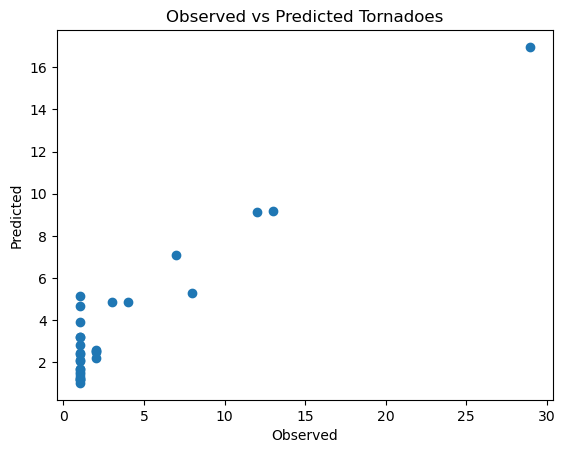

In [17]:
import matplotlib.pyplot as plt 
y_pred = rf.predict(X)

plt.scatter(y, y_pred)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted Tornadoes')

In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error

corr = np.corrcoef(y, y_pred)[0,1]

rmse = mean_squared_error(y, y_pred)

print('Correlation Coefficient:', corr)
print('RMSE:', rmse)

Correlation Coefficient: 0.9449235445872142
RMSE: 8.035576666666666


## 4) One-Hot Encoding

In [19]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output= False)
    
mons = il_merged[['mo']]

month_ohe = ohe.fit_transform(mons)

month_ohe_df = pd.DataFrame(
    month_ohe,
    columns=ohe.get_feature_names_out(['mo']),
    index=il_merged.index
)

X_month = pd.concat([X, month_ohe_df], axis=1)

rf_month = RandomForestRegressor().fit(X_month, y)
y_pred_month = rf_month.predict(X_month)

Text(0.5, 1.0, 'Observed vs One-Hot Encoded Tornadoes')

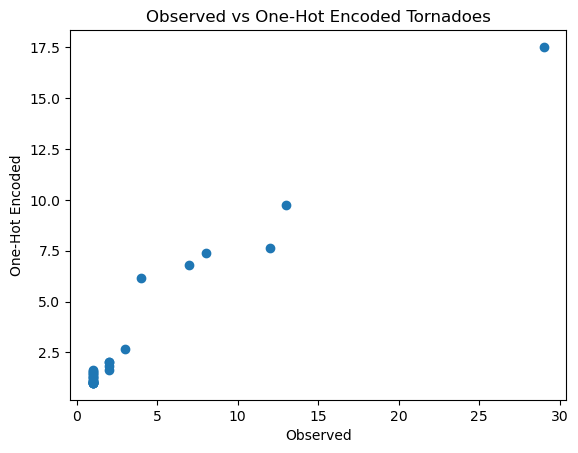

In [20]:
plt.scatter(y, y_pred_month)

plt.xlabel('Observed')
plt.ylabel('One-Hot Encoded')
plt.title('Observed vs One-Hot Encoded Tornadoes')

In [21]:
corr = np.corrcoef(y, y_pred_month)[0,1]

rmse = mean_squared_error(y, y_pred_month)

print('Correlation Coefficient:', corr)
print('RMSE:', rmse)

Correlation Coefficient: 0.9760945217179275
RMSE: 5.625506666666667


## 5) Feature Importance & Multipass Permutation

In [22]:
importance = pd.Series(rf_month.feature_importances_, index = X_month.columns).sort_values

importance

<bound method Series.sort_values of ENSO     0.037839
PDO      0.189837
AO       0.037644
NAO      0.024994
mo_3     0.000592
mo_4     0.000000
mo_5     0.235054
mo_6     0.001160
mo_7     0.000000
mo_8     0.000000
mo_9     0.001390
mo_10    0.000000
mo_11    0.009255
mo_12    0.462236
dtype: float64>

In [23]:
from sklearn.inspection import permutation_importance

permutation = permutation_importance(rf_month, X_month, y)

perm_imp = pd.Series(permutation.importances_mean, index = X_month.columns).sort_values

perm_imp

<bound method Series.sort_values of ENSO     0.019009
PDO      0.139751
AO       0.014155
NAO      0.006512
mo_3    -0.000037
mo_4     0.000000
mo_5     0.244678
mo_6     0.001072
mo_7     0.000000
mo_8     0.000000
mo_9     0.000016
mo_10    0.000000
mo_11    0.002744
mo_12    0.896221
dtype: float64>

## 6) SHAP Summary of Feature Importance & Feature Effects

In [24]:
import shap

explainer = shap.Explainer(rf_month, feature_names = X_month.columns)

shap_values = explainer(X_month)

shap_values

.values =
array([[-5.93926817e-02, -4.00866297e-01,  8.93001282e-02,
         1.74885601e-01, -5.47834943e-03,  0.00000000e+00,
        -5.78470970e-01,  2.34526534e-03,  0.00000000e+00,
         0.00000000e+00,  7.80144359e-04,  0.00000000e+00,
        -3.65918587e-02, -9.18844315e-01],
       [-1.04271121e-01, -4.74345803e-01, -1.10117302e-01,
        -3.98508363e-02, -8.60778960e-03,  0.00000000e+00,
        -6.31447511e-01,  2.34526534e-03,  0.00000000e+00,
         0.00000000e+00,  7.80144359e-04,  0.00000000e+00,
        -5.90906456e-02, -9.27727735e-01],
       [-1.08629399e-01, -5.04429880e-01, -1.12985336e-01,
        -2.05353991e-02, -9.58348889e-03,  0.00000000e+00,
        -6.07487120e-01, -3.50065984e-03,  0.00000000e+00,
         0.00000000e+00,  7.80144359e-04,  0.00000000e+00,
        -6.83839164e-02, -9.27578278e-01],
       [-1.18582374e-01, -3.20437160e-01,  1.02882900e-01,
         1.86111895e-01, -7.82190070e-03,  0.00000000e+00,
        -6.74016266e-01, -9.3610574

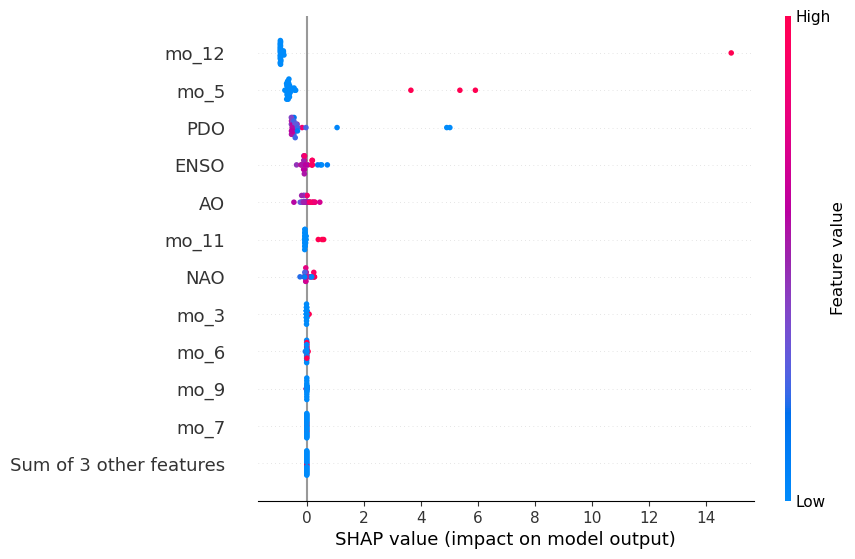

In [25]:
shap.plots.beeswarm(shap_values, max_display = 12)

## 7) SHAP Feature Dependence of ENSO

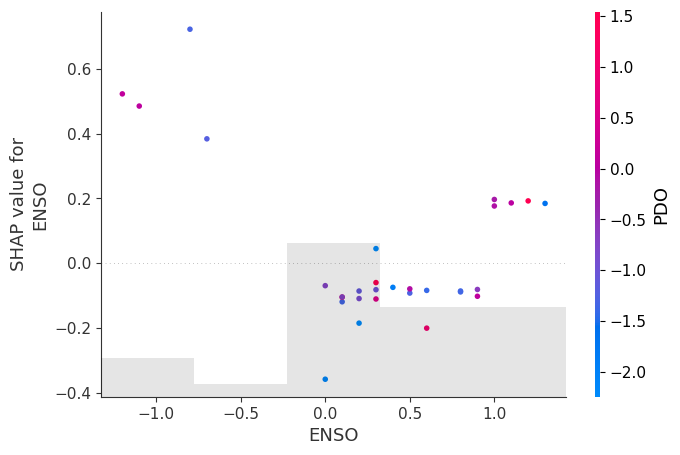

In [26]:
shap.plots.scatter(shap_values[:, 'ENSO'], color=shap_values)

## 8) Observations

##### From this assignment I found it very interesting that ENSO showed to have the lowest correlation coeficient, as well as PDO, NAO and AO. Instead, month of the year is highly correlated which does make sense with 'tornado seasons'. 

##### It is also inportant to note that the one-hot encoding model performed better than the random forest regression with a higher correlation coefficient and lower RMSE.
 